In [6]:
#setup cell imports all the modules required 
import serial
import serial.tools.list_ports
import time
import timeit
%pylab inline
from scipy.optimize import curve_fit
ports = serial.tools.list_ports.comports()
import datetime
import Backend as bk
import os
for p in ports:
    print(p.device)
print (len(ports), 'ports found')


Populating the interactive namespace from numpy and matplotlib
COM3
1 ports found


In [8]:
#Initialising and confirming serial connection
ser = serial.Serial("COM3", baudrate = 9600, timeout = 5)
for i in range(3):
    b = ser.readline()
    readstring = b.decode("utf-8")
    print(readstring)

Imperial College London - Department of Chemistry

Year 3 Physical Chemistry Lab

Version NB1.0 - 8-9-20



In [44]:
ser.close()

In [19]:
#optimising collection time; too short a delay and the data may have a systematic error caused by the delay in the LED lighting up with a new voltage. 
import timeit
def timetest():
    """
    Output: text file containing voltage across the LED and the corresponding sample time starting at t = 0 where the input
    voltage is changed from +0V to +5V. 

    Aim: To determin the response time of the LED and therefore the smallest sampling time without introducing systematic 
    errors with changing voltage across the LED.
    """
    with open("timetest3","w")as output:
        heading = "V_range: 0-5V, V_Step: 5v\n"+"Date : "+ str(datetime.datetime.now())[:10] +"\n" #saving parameters in file and the date
        output.write("time voltage\n") #column headers
        ser.write("<S0.00>".encode())
        ser.readline() #skipping input V reading
        start = timeit.default_timer() 
        ser.write("<S5.00>".encode())
        ser.readline() #skipping reading
        t = 0
        while t < 0.1:
            ser.write("<V2>".encode())
            t += 0.01 #increase in
        t = 0    
        while t < 0.1:
            output.write(str(timeit.default_timer()-start)+" "+ser.readline().decode("utf-8").split()[1]+ "\n") #writing the real time taken
            #output.write("hello world\n")
            t += 0.01
#examining the data showed an immediate plateau starting at 40ms after the first cycle taking 20ms. Therefore a wait time above 40ms is ideal. 

timetest()

In [37]:
#testing code
class dummyserial:
    def __init__(self) -> None:
        self.a  = 0
    def readline(self):
        return "S 1.00".encode()
    def write(self, b):
        self.a = b.decode("utf-8")

test_object = bk.semiconductor_investigation()
test_object.ser = ser
#test_object.collect()
test_object.run()
#test_object.analysis()
#test_object.analysis()
#test_object.ser.close()


Directory already exists


dict_keys(['avg_voltages', 'std_voltages', 'avg_current', 'std_current'])


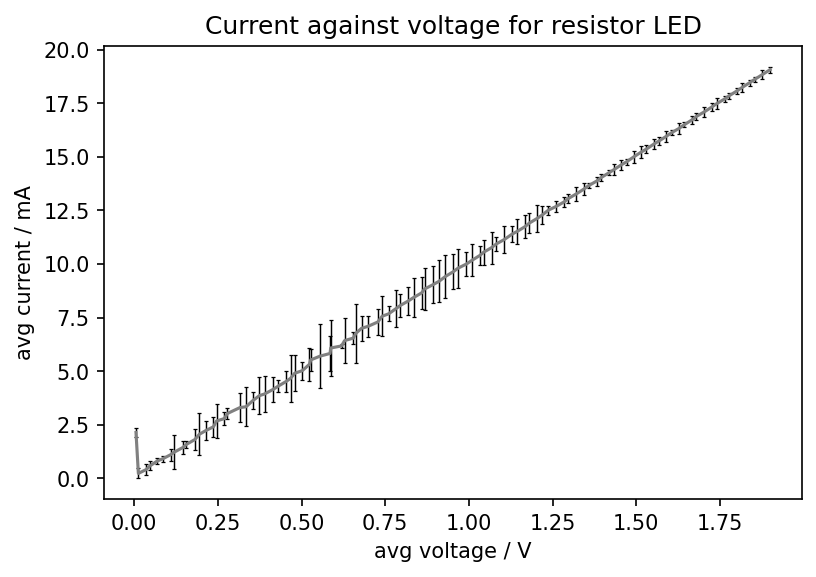

In [82]:
#extracting data from text file such that it is plottable
def getdat(filename):
    """
    this function can put the data from a collumnated file into a dictionary of lists of the columns
    Input
    --------
    filename : string
    this is the file location of the data you want to put into a convenient dictionary

    output
    -------
    columns : dictionary containing string indexes of the columns and a corresponding list of the data
    """
    with open(filename) as file:
        columns = {}
        file = file.readlines()
        for line in range(len(file)):
            if file[line].split()[0] == "Date":
                file = file[line+1:]
                break
        headers = file[0].split()
        
        for i in headers:
            columns[i] = []
        for i in file[1:]:
            b = i.split()
            for j in range(len(headers)):
                columns[headers[j]].append(float(b[j])) 
        return columns
test_dat = getdat("red\\REDaverages")
print(test_dat.keys())
def plot_dat(component):
    rcParams['figure.figsize'] = (6, 4)
    rcParams['figure.dpi'] = 150
    rcParams["errorbar.capsize"] = 1
    colour = component
    if component == "resistor":
        colour = "grey"
    test_dat = getdat(component +"\\" +component.upper() + "averages")
    errorbar(test_dat["avg_voltages"], test_dat["avg_current"], yerr = array(test_dat["std_current"])*50 , color = str(colour), ecolor = "black", elinewidth = 0.7, capthick = 0.6)
    title("Current against voltage for " + str(component) + " LED")
    ylabel("avg current / mA")
    xlabel("avg voltage / V")
plot_dat("resistor")

In [22]:
ser.write("<S5.00>".encode())
ser.readline().decode()

'S 5.000\r\n'

dict_keys(['avg_voltages', 'std_voltages', 'avg_current', 'std_current'])


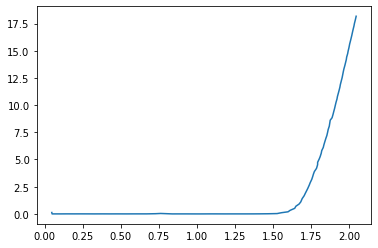